# DL_101: DNN Example
## Regression and Classification

Based on the Course "Scientific Machine and Deep Learning for Design and Construction in Civil Engineering" 

For Questions on this Exercise: anmuel@ethz.ch

## Notebook Content
- [1. Data Set](#Dataset)
- [2. Regression Model](#Regression)
    - Initialisation
    - Training
    - Evaluation
    - MLPRegressor
- [3. Classification Model](#Classification)
    - Initialisation
    - Training
    - Evaluation
    - MLPClassifier

### Package Installation
The following packages are needed and should be installed.

New Package: Tenserflow 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# New Package: Tenserflow intallation --> conda install -c conda-forge tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

## <a name="Dataset"></a>1. Datasets

In this tutorial we will look at a dataset containing information on concrete samples and their strengths. We will predict continuous values (variable *Strength*) through Regression and the categorical variable *concrete type* through Classification.


Explanation of features in the data set [1]:

$$
\begin{array}{ll}
\text { Variable } & \text { Description } \\
\hline \text { Cement } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \begin{array}{l}
\text { Blast Furnace } \\
\text { Slag }
\end{array} & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Fly Ash } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Water } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Superplasticizer } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Coarse Aggregate } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Fine Aggregate } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Age } & \text { Age (in days) of concrete mix } \\
\hline \text { Concrete } & \text { measure in megapascals (MPa) } \\
\text { Compressive } & \\
\text { Strength } & \\
\hline
\end{array}
$$

The (unmodified, continuous columns only) data set can also be found [here](https://www.kaggle.com/datasets/vinayakshanawad/cement-manufacturing-concrete-dataset). [1]


To also implement a classification example with the same dataset, we expanded the data set by one feature: Concrete Grade. Depending on the strength each concrete sample was assigned its concrete grade acc. to SIA 262 (2013) 3.1.2.2.7.; with assuming that the concrete compressive strength is the mean value of the cylinder compressive strength ($f_{cm}$)


$$
\begin{array}{ll}
\hline \text { Concrete Grade } & \text { acc. to SIA 262 (2013) 3.1.2.2.7} \\
\hline
\end{array}
$$

### Concrete Data Set


In [3]:
concrete_full = pd.read_csv('concrete_full_withGrades.csv', usecols=[1,2,3,4,5,6,7,8,9,10]) 
# we need to ignore the first column, since it only contains an additional index to the data

In [4]:
print(concrete_full.shape)

(1030, 10)


In [5]:
concrete_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast_Furnace_Slag  1030 non-null   float64
 2   Fly_Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse_Aggregate    1030 non-null   float64
 6   Fine_Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
 9   Concrete_Grade      1030 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 80.6+ KB


In [6]:
concrete_full.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength,Concrete_Grade
0,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64,C25/30
1,339.0,0.0,0.0,197.0,0.0,968.0,781.0,7,20.97,C16/20
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,56,38.33,C30/37
3,233.8,0.0,94.6,197.9,4.6,947.0,852.2,100,34.56,C25/30
4,350.0,0.0,0.0,186.0,0.0,1050.0,770.0,28,34.29,C25/30


We can check that this data set does not contain missing values, and how the values are distributed.

In [7]:
concrete_full.loc[concrete_full['Concrete_Grade'] == 'NoClass']
# the values with "No Class" are concrete samples which have a too low strenght that they could be in any class.

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength,Concrete_Grade
5,145.0,0.0,134.0,181.0,11.0,979.0,812.0,28,13.20,NoClass
15,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7,11.96,NoClass
18,181.9,272.8,0.0,185.7,0.0,1012.4,714.3,7,12.37,NoClass
22,183.9,122.6,0.0,203.5,0.0,959.2,800.0,7,10.79,NoClass
26,155.0,0.0,143.0,193.0,9.0,877.0,868.0,28,9.74,NoClass
...,...,...,...,...,...,...,...,...,...,...
990,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,NoClass
1001,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,7,14.59,NoClass
1005,220.8,147.2,0.0,185.7,0.0,1055.0,744.3,7,13.09,NoClass
1020,108.3,162.4,0.0,203.5,0.0,938.2,849.0,7,7.72,NoClass


In [8]:
concrete_full.isnull().sum()

Cement                0
Blast_Furnace_Slag    0
Fly_Ash               0
Water                 0
Superplasticizer      0
Coarse_Aggregate      0
Fine_Aggregate        0
Age                   0
Strength              0
Concrete_Grade        0
dtype: int64

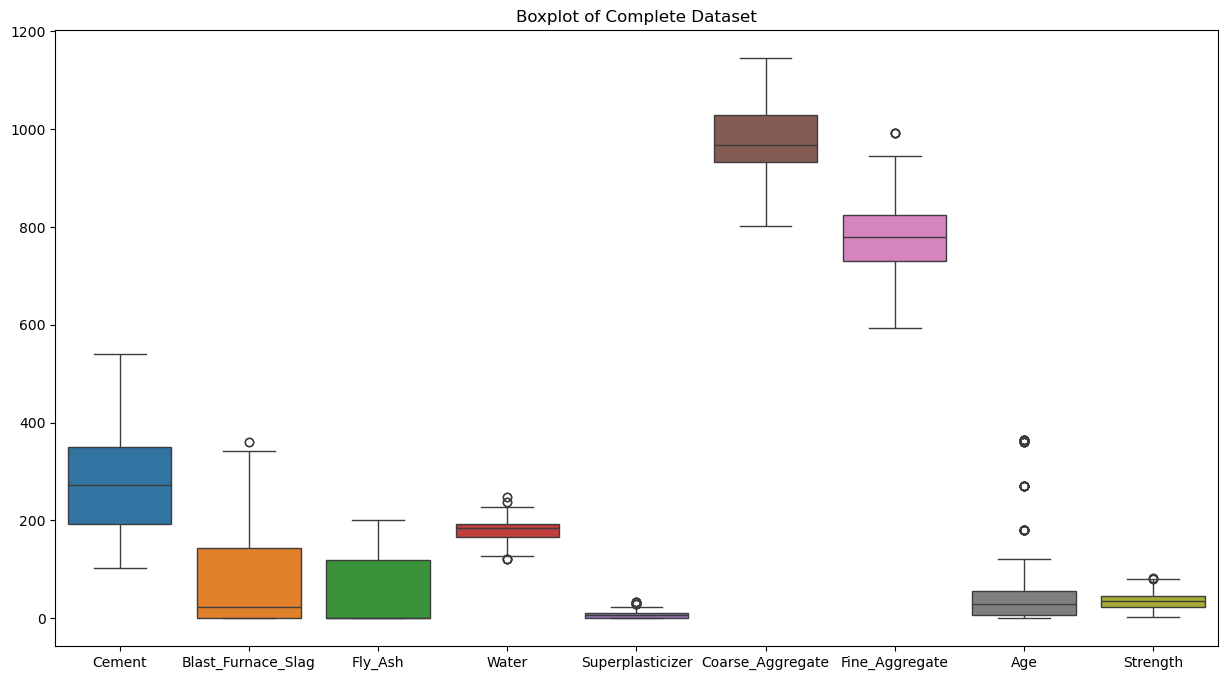

In [9]:
plt.figure(figsize=(15,8))
plt.title('Boxplot of Complete Dataset')
sns.boxplot(data=concrete_full);

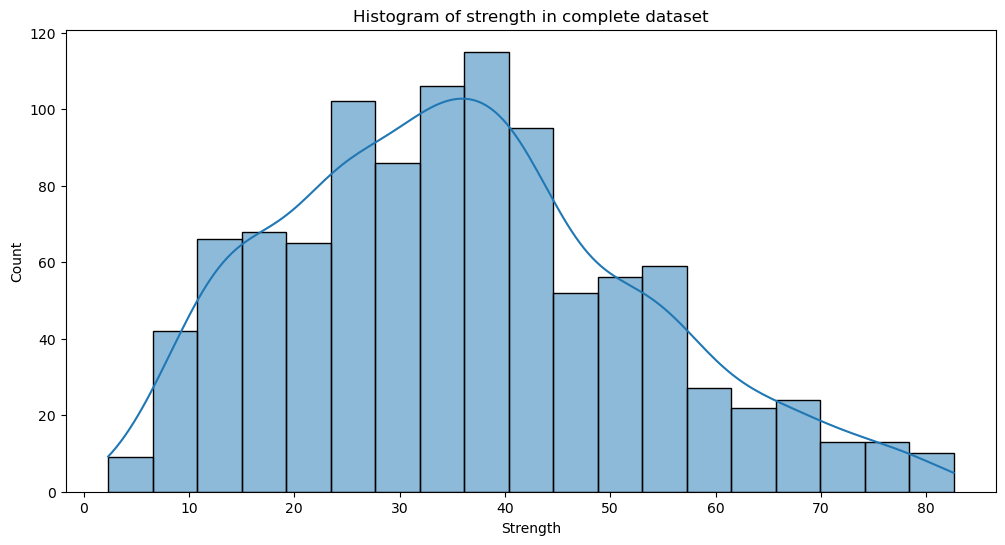

In [10]:
plt.figure(figsize=(12,6))
plt.title('Histogram of strength in complete dataset')
sns.histplot(data=concrete_full,x='Strength', kde=True);

C:\Users\anmuel\AppData\Local\Temp\ipykernel_28076\738281266.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


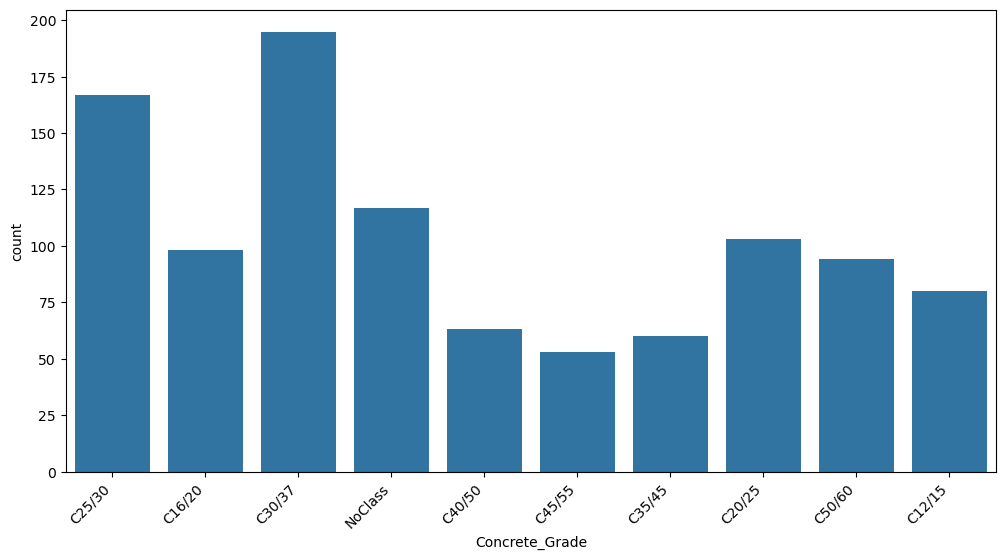

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=concrete_full, x='Concrete_Grade', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Now we need to split the dataset into train and test set, and separate the target variables (*Strength*, *Concrete_Grade*) from the input variables.

In [12]:
concrete_full.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength',
       'Concrete_Grade'],
      dtype='object')

In [13]:
concrete_full['Concrete_Grade'] = concrete_full['Concrete_Grade'].astype('category')

In [14]:
concrete_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Cement              1030 non-null   float64 
 1   Blast_Furnace_Slag  1030 non-null   float64 
 2   Fly_Ash             1030 non-null   float64 
 3   Water               1030 non-null   float64 
 4   Superplasticizer    1030 non-null   float64 
 5   Coarse_Aggregate    1030 non-null   float64 
 6   Fine_Aggregate      1030 non-null   float64 
 7   Age                 1030 non-null   int64   
 8   Strength            1030 non-null   float64 
 9   Concrete_Grade      1030 non-null   category
dtypes: category(1), float64(8), int64(1)
memory usage: 73.9 KB


In [15]:
cont_columns = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength']
cat_columns = ['Concrete_Grade']

In [16]:
# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
concrete_full[cont_columns] = scaler.fit_transform(concrete_full[cont_columns])
concrete_full.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength,Concrete_Grade
0,-0.284981,-0.856888,1.002278,0.324811,0.032715,0.713893,-0.198167,0.163731,0.049231,C25/30
1,0.553653,-0.856888,-0.847144,0.723052,-1.039143,-0.063294,0.092585,-0.612331,-0.889226,C16/20
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,0.163731,0.150443,C30/37
3,-0.453474,-0.856888,0.631768,0.765219,-0.268745,-0.333507,0.981063,0.860604,-0.075338,C25/30
4,0.658961,-0.856888,-0.847144,0.207681,-1.039143,0.991828,-0.044680,-0.279733,-0.091508,C25/30


In [17]:
# split data and labels for regression
REG_concrete_X = concrete_full.loc[:, ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age']]
REG_concrete_y = concrete_full.loc[:, 'Strength']

# split data and labels for classification
CAT_concrete_X = concrete_full.loc[:, ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age']]    #note: there's no 'strength' variable in the features.
CAT_concrete_y = concrete_full.loc[:, 'Concrete_Grade']

In [18]:
REG_train_X, REG_test_X, REG_train_y, REG_test_y = train_test_split(REG_concrete_X, REG_concrete_y, test_size=0.33, random_state=42)

CAT_train_X, CAT_test_X, CAT_train_y, CAT_test_y = train_test_split(CAT_concrete_X, CAT_concrete_y, test_size=0.33, random_state=42)

In [19]:
REG_train_X.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
900,-1.303595,-0.856888,1.951221,0.957312,0.300680,-1.916189,1.190704,-0.279733
370,0.141995,-0.856888,-0.847144,0.488793,-1.039143,1.442184,-0.107073,-0.612331
604,-1.112126,-0.856888,1.397801,-0.832431,-1.039143,0.420518,1.588772,-0.675683
973,-1.092980,0.017442,1.763621,-0.823061,0.283932,0.442393,-0.043432,-0.501465
593,-1.112126,0.633184,1.218018,-0.303004,0.317427,0.423092,-0.336679,-0.675683


In [20]:
REG_train_y.head()

900   -1.513865
370   -1.294672
604   -1.282695
973   -0.174753
593   -0.982053
Name: Strength, dtype: float64

In [21]:
CAT_train_X.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
900,-1.303595,-0.856888,1.951221,0.957312,0.300680,-1.916189,1.190704,-0.279733
370,0.141995,-0.856888,-0.847144,0.488793,-1.039143,1.442184,-0.107073,-0.612331
604,-1.112126,-0.856888,1.397801,-0.832431,-1.039143,0.420518,1.588772,-0.675683
973,-1.092980,0.017442,1.763621,-0.823061,0.283932,0.442393,-0.043432,-0.501465
593,-1.112126,0.633184,1.218018,-0.303004,0.317427,0.423092,-0.336679,-0.675683


In [22]:
CAT_train_y.head()

900    NoClass
370    NoClass
604    NoClass
973     C25/30
593     C12/15
Name: Concrete_Grade, dtype: category
Categories (10, object): ['C12/15', 'C16/20', 'C20/25', 'C25/30', ..., 'C40/50', 'C45/55', 'C50/60', 'NoClass']

## <a name="Regression"></a>2. Regression

### Initialisation

In a first step, we will try to predict the continuous variable *Strength* based on the other 8 continuous variables. Since *Strength* is a real number, we will use a Regression model to predict its value. 

We start with building a sequential model. With a sequential model, we are able to build a plain stack of layers where each layer has one input tensor and one output tensor.

![Sequential Model](https://editor.analyticsvidhya.com/uploads/48655toy%20network.png) Example image for a sequential model. [[3]](https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/)

We first initialize our sequential model and then add layers one by one.

As activation function we choose the Rectified Linear Unit (ReLU).
The ReLU is a piecewise linear function that will output the input directly if it is positive, otherwise it will output zero.
It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance. [[4]](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)



In [26]:
reg_model = Sequential(name='multi_layer_perceptron')
#input Layer
reg_model.add(tf.keras.Input(shape=8)) # represent data points, shape = number of predictor variables

#hidden layers
reg_model.add(tf.keras.layers.Dense(32, activation='relu', name='layer1'))
reg_model.add(tf.keras.layers.Dense(16, activation='relu', name='layer2'))

# Output layer
# we desire a one-dimensional output (predict one number), so the last layer is of size 1
reg_model.add(tf.keras.layers.Dense(1, name='layer3')) # no activation in last layer of regression problems

In [27]:
reg_model.summary()

Model: "multi_layer_perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                288       
                                                                 
 layer2 (Dense)              (None, 16)                528       
                                                                 
 layer3 (Dense)              (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


Next, we specify the training configuration. We define a learning rate and choose the Mean Squared Error (MSE) as our loss function. For the training process we choose the Adam Optimization Algorithm [[5]](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).

In [28]:
reg_lr = 1e-4
reg_loss = 'mse'

In [29]:
reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=reg_lr), loss=reg_loss)

### Training

Now we can fit and evaluate the model. 
(Note that the accuracy only makes sense in categorical data, not for continuous predictions (the model will most certainly never predict the correct value to full precision).)

We fit the train the model on our training data set by calling the `fit()` function. This will train our model by slicing the training data into batches of size `batch_size` and repeatedly iterating over the entire dataset for a specified number of `epochs`.

In [30]:
reg_epochs = 500
reg_batch_size = 10

In [31]:
reg_history = reg_model.fit(REG_train_X, REG_train_y, epochs=reg_epochs, batch_size = reg_batch_size)

Epoch 1/500
69/69 [==============================] - 1s 2ms/step - loss: 1.0424
Epoch 2/500
69/69 [==============================] - 0s 2ms/step - loss: 0.9440
Epoch 3/500
69/69 [==============================] - 0s 3ms/step - loss: 0.8667
Epoch 4/500
69/69 [==============================] - 0s 3ms/step - loss: 0.8036
Epoch 5/500
69/69 [==============================] - 0s 4ms/step - loss: 0.7514
Epoch 6/500
69/69 [==============================] - 0s 3ms/step - loss: 0.7068
Epoch 7/500
69/69 [==============================] - 0s 4ms/step - loss: 0.6680
Epoch 8/500
69/69 [==============================] - 0s 3ms/step - loss: 0.6347
Epoch 9/500
69/69 [==============================] - 0s 4ms/step - loss: 0.6075
Epoch 10/500
69/69 [==============================] - 0s 4ms/step - loss: 0.5838
Epoch 11/500
69/69 [==============================] - 0s 4ms/step - loss: 0.5622
Epoch 12/500
69/69 [==============================] - 0s 3ms/step - loss: 0.5425
Epoch 13/500
69/69 [=================

### Evaluation

In [32]:
results = reg_model.evaluate(REG_test_X, REG_test_y, batch_size=128)
print("test loss (MSE):", results)

3/3 [==============================] - 0s 4ms/step - loss: 0.0991
test loss (MSE): 0.09907402843236923


In [42]:
from sklearn.metrics import r2_score
REG_pred_train = reg_model.predict(REG_train_X)
REG_pred_test = reg_model.predict(REG_test_X)

11/11 [==============================] - 0s 4ms/step


In [44]:
r2_train = r2_score(REG_train_y, REG_pred_train)
r2_test = r2_score(REG_test_y, REG_pred_test)
print("r2_train: ", r2_train, "r2_test: ", r2_test)

r2_train:  0.9406416920632519 r2_test:  0.8927169574975397


print the results

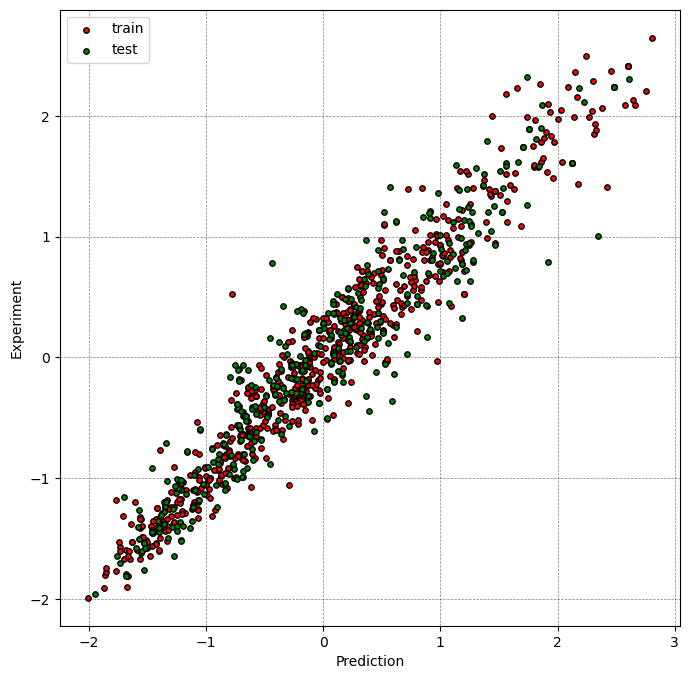

In [47]:
plt.figure(figsize=(8,8))
# plt.xlim(0,1.7e7)
# plt.ylim(0,1.7e7)
# plt.plot([0,2.5e7], [0,2.5e7], color="black", linewidth=1, linestyle="--")
plt.scatter(REG_train_y, REG_pred_train, s=15, color="red", edgecolors="black", label="train")
plt.scatter(REG_test_y, REG_pred_test, s=15, color="green", edgecolors="black", label="test")
plt.grid(True, which='major', color='k', linestyle='--', linewidth=0.5, alpha=0.5)
plt.ylabel("Experiment")
plt.xlabel("Prediction")
plt.legend()
#plt.show()

### MLP Regressor


Instead of building a regressor layer by layer on our own like above, we now use a predefined function.

We use the functionality of [SKLearn MPLRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) to build a Multi Layer Perceptron.

In [33]:
# training
regr = MLPRegressor(random_state=1, max_iter=reg_epochs, learning_rate_init=reg_lr).fit(REG_train_X, REG_train_y)

# evaluation
regr.predict(REG_test_X)
regr.score(REG_test_X, REG_test_y)

C:\Users\anmuel\AppData\Local\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7714424434795052

The 'score' functionality computes the $R^2$-Score (coefficient of determination), which is defined as $ R^2 = (1 - \frac{u}{v})$ where 

$u = \sum{(\text{y\_true} - \text{y\_pred})^2}$

$v = \sum{(\text{y\_true} - \text{mean(y\_true)})^2}$

The best score is **1.0** and it can go into the negative values. [2]


If we compute the same for our custom Regressor, we get:

In [34]:
pred_custom = reg_model.predict(REG_test_X)

11/11 [==============================] - 0s 2ms/step


In [35]:
r2_custom = r2_score(REG_test_y, pred_custom)
print(r2_custom)

0.8927169574975397


We also have the option to customise the layer layout with the MLPRegressor:

In [40]:
layer_layout = (128, 56, 32)

In [41]:
regr_2 = MLPRegressor(random_state=1, max_iter=reg_epochs, learning_rate_init=reg_lr, hidden_layer_sizes=layer_layout).fit(REG_train_X, REG_train_y)
regr_2.predict(REG_test_X)
regr_2.score(REG_test_X, REG_test_y)

0.8952871779708146

To further optimise the model, several parameters of the MLPRegressor can be varied. For example we could use an adaptive learning rate (```learning_rate = 'adaptive'```) or set an ```alpha``` value to use a different L2 regularization. All available parameters can be found in the sklearn [MLPRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html). 

## <a name="Classification"></a>3. Classification

### Initialisation

To do a classification on the data, we can build a custom Classifier similarly to the Regressor seen above.

In [23]:
categories = concrete_full['Concrete_Grade'].cat.categories
print('categories in data set:', categories)
num_cat = len(categories)
print('number of categories:', num_cat)

categories in data set: Index(['C12/15', 'C16/20', 'C20/25', 'C25/30', 'C30/37', 'C35/45', 'C40/50',
       'C45/55', 'C50/60', 'NoClass'],
      dtype='object')
number of categories: 10


Our classification problem consists of **10** classes, which is why we need some extra steps to perform the multi-class prediction. We use the sklearn [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html?highlight=labelbinarizer) to **one-hot encode** each data point. Each target class gets converted into an array of length *num_cat*, containing all 0 and a 1 indicating which class is assigned with this label.

In [24]:
binarizer = LabelBinarizer().fit(CAT_train_y)
CAT_train_y_binarized = binarizer.transform(CAT_train_y)
print(CAT_train_y_binarized)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [25]:
#initialize model
cat_model = Sequential(name='mlp_cat')
#input layer
cat_model.add(tf.keras.Input(shape=8)) # represent data points, shape = number of predictor variables
# hidden layers
cat_model.add(tf.keras.layers.Dense(32, activation='relu', name='layer1'))
cat_model.add(tf.keras.layers.Dense(16, activation='relu', name='layer2'))
#ouput layer
# we have 10 possible output dimensions, so our last layer has dimension 10
# the softmax activation forces all categories' probabilities adding up to 1
cat_model.add(tf.keras.layers.Dense(num_cat, activation='softmax', name='layer3')) # no activation in last layer of regression problems

In [26]:
cat_model.summary()

Model: "mlp_cat"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                288       
                                                                 
 layer2 (Dense)              (None, 16)                528       
                                                                 
 layer3 (Dense)              (None, 10)                170       
                                                                 
Total params: 986
Trainable params: 986
Non-trainable params: 0
_________________________________________________________________


Since we are predicting labels from more than 2 categories, we need to use the [Categorical Crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) loss. We also report the accuracy together with the loss to evaluate our model's performance.

In [27]:
cat_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training

In [28]:
cat_history = cat_model.fit(CAT_train_X, CAT_train_y_binarized, epochs=500, batch_size = 10)

Epoch 1/500
69/69 [==============================] - 1s 2ms/step - loss: 2.3895 - accuracy: 0.1246
Epoch 2/500
69/69 [==============================] - 0s 2ms/step - loss: 2.2473 - accuracy: 0.2087
Epoch 3/500
69/69 [==============================] - 0s 2ms/step - loss: 2.1659 - accuracy: 0.2362
Epoch 4/500
69/69 [==============================] - 0s 2ms/step - loss: 2.0853 - accuracy: 0.2594
Epoch 5/500
69/69 [==============================] - 0s 2ms/step - loss: 2.0022 - accuracy: 0.3029
Epoch 6/500
69/69 [==============================] - 0s 2ms/step - loss: 1.9142 - accuracy: 0.3536
Epoch 7/500
69/69 [==============================] - 0s 2ms/step - loss: 1.8326 - accuracy: 0.3623
Epoch 8/500
69/69 [==============================] - 0s 3ms/step - loss: 1.7616 - accuracy: 0.3725
Epoch 9/500
69/69 [==============================] - 0s 4ms/step - loss: 1.6976 - accuracy: 0.3855
Epoch 10/500
69/69 [==============================] - 0s 4ms/step - loss: 1.6444 - accuracy: 0.3870
Epoch 11/

### Evaluation

In [29]:
CAT_test_y_binarized = binarizer.transform(CAT_test_y)
results_cat = cat_model.evaluate(CAT_test_X, CAT_test_y_binarized, batch_size=128)
print("test loss, test accuracy:", results_cat)

# accuracy: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy
# calculates how often a prediction is equal to a label --> accuracy = 1 is best.

3/3 [==============================] - 1s 6ms/step - loss: 1.9520 - accuracy: 0.5265
test loss, test accuracy: [1.9519782066345215, 0.5264706015586853]


We can visualise the performance of our model by plotting a confusion matrix. It tells us how often one class got confused with another class. An accurate classifier has high numbers on the diagonal, which represents the correct labels.

11/11 [==============================] - 0s 2ms/step


<Axes: >

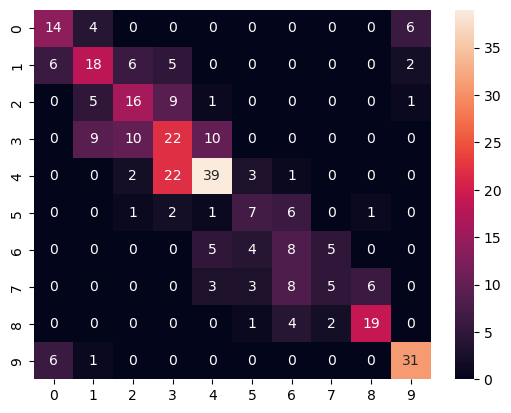

In [34]:
# see what the classifier predicted for our test data
predictions = cat_model.predict(CAT_test_X)

pred_cat = binarizer.inverse_transform(predictions)

cf_matrix = confusion_matrix(CAT_test_y, pred_cat)
sns.heatmap(cf_matrix, annot=True)

In [35]:
# if we want to know which class corresponds to which number, we can access the classes_ attribute of the LabelBinarizer()
binarizer.classes_

array(['C12/15', 'C16/20', 'C20/25', 'C25/30', 'C30/37', 'C35/45',
       'C40/50', 'C45/55', 'C50/60', 'NoClass'], dtype='<U7')

### MLPClassifier

Analogous to the regression, we can also use pre-implemented models from sklearn to build our classifier. As an example, we use the [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier):

In [36]:
cat_mlp = MLPClassifier(random_state=1, max_iter=1000).fit(CAT_train_X, CAT_train_y_binarized)
cat_mlp.score(CAT_test_X, CAT_test_y_binarized) # mean accuracy

C:\Users\anmuel\AppData\Local\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2735294117647059

## Resources
[1] https://www.kaggle.com/datasets/vinayakshanawad/cement-manufacturing-concrete-dataset \
[2] https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score \
[3] https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/ \
[4] https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/ \
[5] https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
